# Zalando Fashion-MNIST Quick Model: Data Loading, Training, and Inference

## Step 1: Import Required Libraries
Import necessary libraries for data processing, modeling, and visualization.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

## Step 2: Load the Fashion-MNIST Dataset
Load the Fashion-MNIST dataset directly from TensorFlow's datasets.

In [64]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

## Step 3: Visualize a Sample of the Dataset
Display the first few images from the training dataset to understand the type of fashion items.

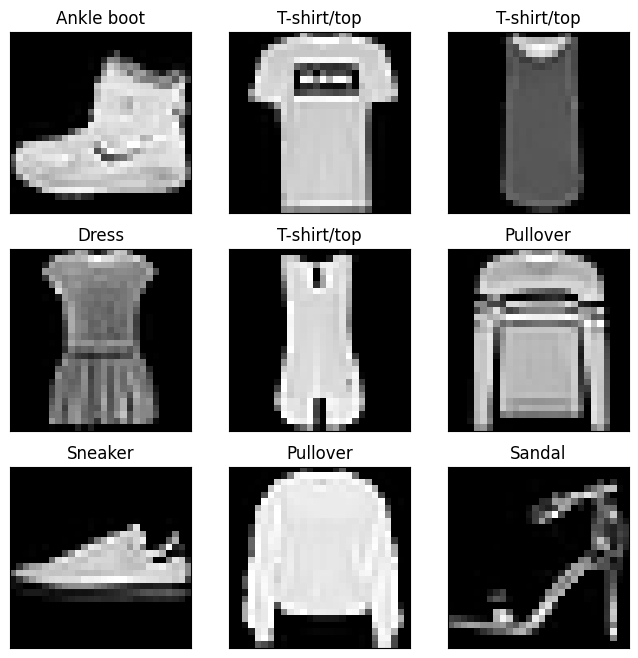

In [67]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

## Step 4: Preprocess the Data (Normalization)
Normalize pixel values to a range of 0 to 1 and reshape images to include a channel dimension.

In [70]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

## Step 5: Build a Simple CNN Model
Create a basic Convolutional Neural Network for classifying fashion items.

In [73]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Step 6: Compile the Model
Configure the model for training by specifying the optimizer, loss function, and metrics.

In [76]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 7: Train the Model
Train the model on the training data, reserving 20% for validation.

In [79]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7950 - loss: 0.6007 - val_accuracy: 0.8757 - val_loss: 0.3499
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8937 - loss: 0.2985 - val_accuracy: 0.8997 - val_loss: 0.2829
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9113 - loss: 0.2512 - val_accuracy: 0.9004 - val_loss: 0.2761
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9192 - loss: 0.2184 - val_accuracy: 0.9038 - val_loss: 0.2691
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9279 - loss: 0.1962 - val_accuracy: 0.9130 - val_loss: 0.2511


## Step 8: Evaluate the Model on Test Data
Evaluate model performance on the separate test dataset to check generalization.

In [82]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 0s - 2ms/step - accuracy: 0.9057 - loss: 0.2635
Test Accuracy: 0.9057


## Step 9: Make Predictions on Test Data
Predict labels for the test images and visualize a few examples with predictions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


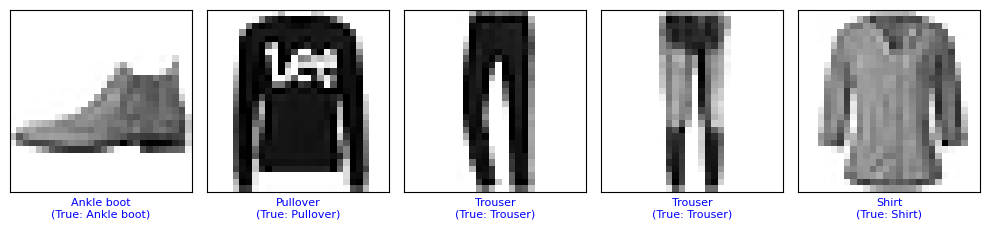

In [87]:
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]}\n(True: {class_names[true_label]})", color=color, fontsize=8)

# Plot first few predictions with improved layout
plt.figure(figsize=(10,4))  # Wider figure
for i in range(5):
    plt.subplot(1, 5, i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()  # Prevents overlapping
plt.show()